# Econometría básica con Python

Fabián Alejandro Triana Alarcón

fatrianaa@unal.edu.co 

Economista. Estudiante de Maestría en Ciencias Económicas.

Universidad Nacional de Colombia

# Tercera Sesión: Regresión por MCO

## Importación de datos

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [3]:
data = pd.read_csv('GujaratiPorter71.txt', delimiter = '\t')
data.head()

,CM,FLR,PGNP,TFR
0,128,37,1870,6.66
1,204,22,130,6.15
2,202,16,310,7.00
3,197,65,570,6.25
4,96,76,2050,3.81


El dataset que se emplea es el del Ejemplo 7.1, *Mortalidad infantil en relación con el PIB per cápita y la tasa de alfabetización de las mujeres*, de **Gujarati y Porter** (2010)

## Regresión por MCO:

La función `OLS(...)` de Statsmodels permite realizar estimación por el método de Mínimos Cuadrados Ordinarios. 

In [4]:
Modelo = sm.OLS(data['CM'], data['PGNP'])
Resultados = Modelo.fit()
print(Resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     3.710
Date:                Tue, 21 Apr 2020   Prob (F-statistic):             0.0586
Time:                        23:20:29   Log-Likelihood:                -413.92
No. Observations:                  64   AIC:                             829.8
Df Residuals:                      63   BIC:                             832.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PGNP           0.0124      0.006      1.926      0.0

¿Dónde está $\beta_{0}$? La función `OLS(...)` de Statsmodels **no** incluye por defecto el término de intercepto, por lo que, explícitamente, debe señalarse si se necesita incluirlo. Esto se logra fácilmente con la función `add_constant(...)` de Statsmodels.

In [5]:
Modelo = sm.OLS(data['CM'], sm.add_constant(data['PGNP']))
Resultados = Modelo.fit()
print(Resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     12.36
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           0.000826
Time:                        23:24:06   Log-Likelihood:                -361.64
No. Observations:                  64   AIC:                             727.3
Df Residuals:                      62   BIC:                             731.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        157.4244      9.846     15.989      0.0

Los valores estimados de la variable dependiente (coloquialmente llamados "y gorro") se obtienen con la aplicación del método `.predict()` sobre la instancia de resultados del modelo.

In [6]:
Valores_estimados = Resultados.predict()

In [7]:
import matplotlib.pyplot as plt

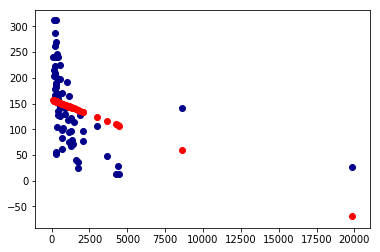

In [8]:
fig, ax = plt.subplots()
ax.scatter(data['PGNP'], data['CM'], color = 'darkblue')
ax.scatter(data['PGNP'], Valores_estimados, color = 'red')
plt.show()

## Recíproco

La forma funcional no parece adaptarse correctamente al comportamiento de los datos. ¿Qué pasa si se incluye la variable transformada? Para este caso, el recíproco parece tener un mejor desempeño:

In [9]:
data['1/PGNP'] = 1/data['PGNP']

In [10]:
data.head()

,CM,FLR,PGNP,TFR,1/PGNP
0,128,37,1870,6.66,0.000535
1,204,22,130,6.15,0.007692
2,202,16,310,7.00,0.003226
3,197,65,570,6.25,0.001754
4,96,76,2050,3.81,0.000488


In [11]:
Modelo = sm.OLS(data['CM'], sm.add_constant(data['1/PGNP']))
Resultados = Modelo.fit()
print(Resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     52.61
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           7.82e-10
Time:                        23:34:24   Log-Likelihood:                -347.79
No. Observations:                  64   AIC:                             699.6
Df Residuals:                      62   BIC:                             703.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.7944     10.832      7.551      0.0

In [12]:
Valores_estimados = Resultados.predict()

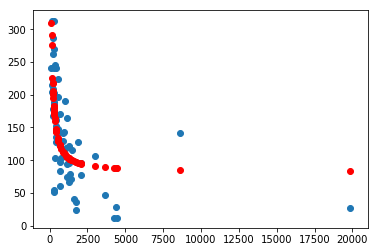

In [15]:
fig, ax = plt.subplots()
ax.scatter(data['PGNP'], data['CM'])
ax.scatter(data['PGNP'], Valores_estimados, color = 'red')
plt.show()

# Regresión lineal múltiple

En la regresión previa se empleó una única variable explicativa; sin embargo, es posible incluir múltiples regresoras. En primer lugar, examinemos la relación entre pares de variables para tener una idea de qué podemos obtener al incluir distintas variables explicativas.

In [16]:
import seaborn as sns

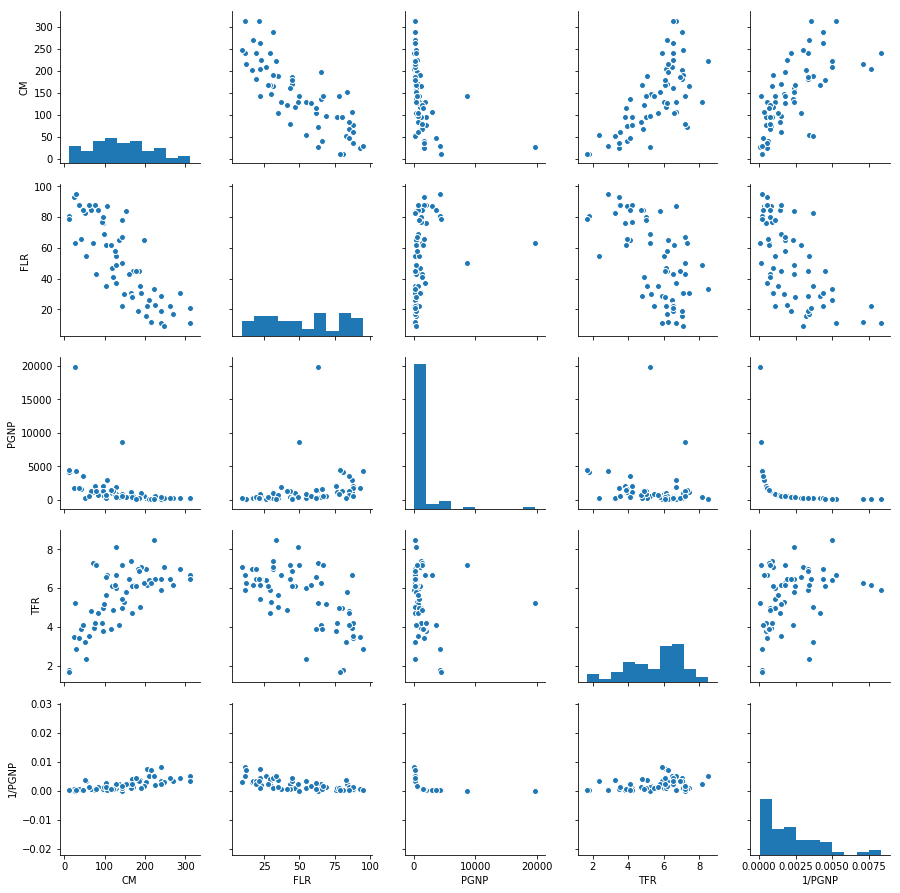

In [17]:
sns.pairplot(data)

Se observa una relación negativa entre el PIB per cápita (PGNP) y la mortalidad infantil (CM) y entre la tasa de alfabetización de las mujeres (FLR) y la mortalidad infantil (CM)... Los coeficientes asociados, ¿son negativos?

In [19]:
Modelo = sm.OLS(data['CM'], sm.add_constant(data[['PGNP', 'FLR']]))
Resultados = Modelo.fit()
print(Resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     73.83
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           5.12e-17
Time:                        23:45:10   Log-Likelihood:                -328.10
No. Observations:                  64   AIC:                             662.2
Df Residuals:                      61   BIC:                             668.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        263.6416     11.593     22.741      0.0

Incluyendo el término del intercepto se obtiene:

In [20]:
Y = data['CM']
X = sm.add_constant(data[['PGNP', 'FLR']])
Modelo = sm.OLS(Y,X)
Resultados = Modelo.fit()
print(Resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     73.83
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           5.12e-17
Time:                        23:47:52   Log-Likelihood:                -328.10
No. Observations:                  64   AIC:                             662.2
Df Residuals:                      61   BIC:                             668.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        263.6416     11.593     22.741      0.0

**¿Qué información puede obtenerse de un modelo estimado por MCO en Python?**

La función `dir(...)` es una función *built-in* de Python que permite conocer los métodos y atributos de un objeto. Para este caso, la instancia de resultados de un modelo estimado por MCO contiene la siguiente información:

In [21]:
dir(Resultados)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',
 'mse_model',
 'mse_re

Por ejemplo, el coeficiente de determinación o $R^2$ es un atributo de la instancia de resultados:

In [22]:
Resultados.rsquared

0.7076654981900712

Del mismo modo, el coeficiente de determinación ajustado:

In [23]:
Resultados.rsquared_adj

0.6980807604258112